In [1]:
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

2022-11-25 17:05:04.884517: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-25 17:05:04.980246: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-11-25 17:05:05.402402: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/usr/local/cuda-11.3/lib64
2022-11-25 17:05:05.402445: W tensorflow/compiler/xla/strea

1 Physical GPUs, 1 Logical GPUs


2022-11-25 17:05:05.960827: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-25 17:05:05.964898: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-25 17:05:05.965208: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-25 17:05:05.965851: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operati

In [2]:
import numpy as np
import pandas as pd
import os
import glob
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras import Sequential, models
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
path = './data/o_x/'

dataset = {
    "image_path": [],
    "ox_status": [],
    "where": []
}

for where in os.listdir(path):
  for status in os.listdir(path+"/"+where):
    for image in glob.glob(path+where+"/"+status+"/"+"*.jpg"):
      dataset["image_path"].append(image)
      dataset["ox_status"].append(status)
      dataset["where"].append(where)

dataset = pd.DataFrame(dataset)
dataset.head(20)

,image_path,ox_status,where
0,./data/o_x/Train/o/o40.jpg,o,Train
1,./data/o_x/Train/o/o46.jpg,o,Train
2,./data/o_x/Train/o/o43.jpg,o,Train
3,./data/o_x/Train/o/o35.jpg,o,Train
4,./data/o_x/Train/o/o31.jpg,o,Train
5,./data/o_x/Train/o/o28.jpg,o,Train
6,./data/o_x/Train/o/o48.jpg,o,Train
7,./data/o_x/Train/o/o33.jpg,o,Train
8,./data/o_x/Train/o/o34.jpg,o,Train
9,./data/o_x/Train/o/o29.jpg,o,Train


o: 22
x: 22


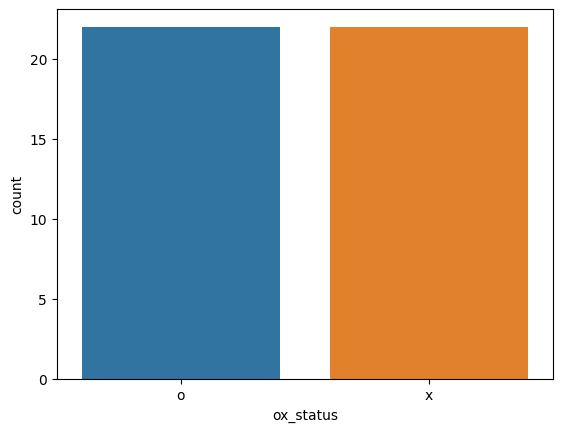

In [4]:
print(f"o:", dataset.value_counts("ox_status")[1])
print(f"x:", dataset.value_counts("ox_status")[0])

sns.countplot(x = dataset["ox_status"]);

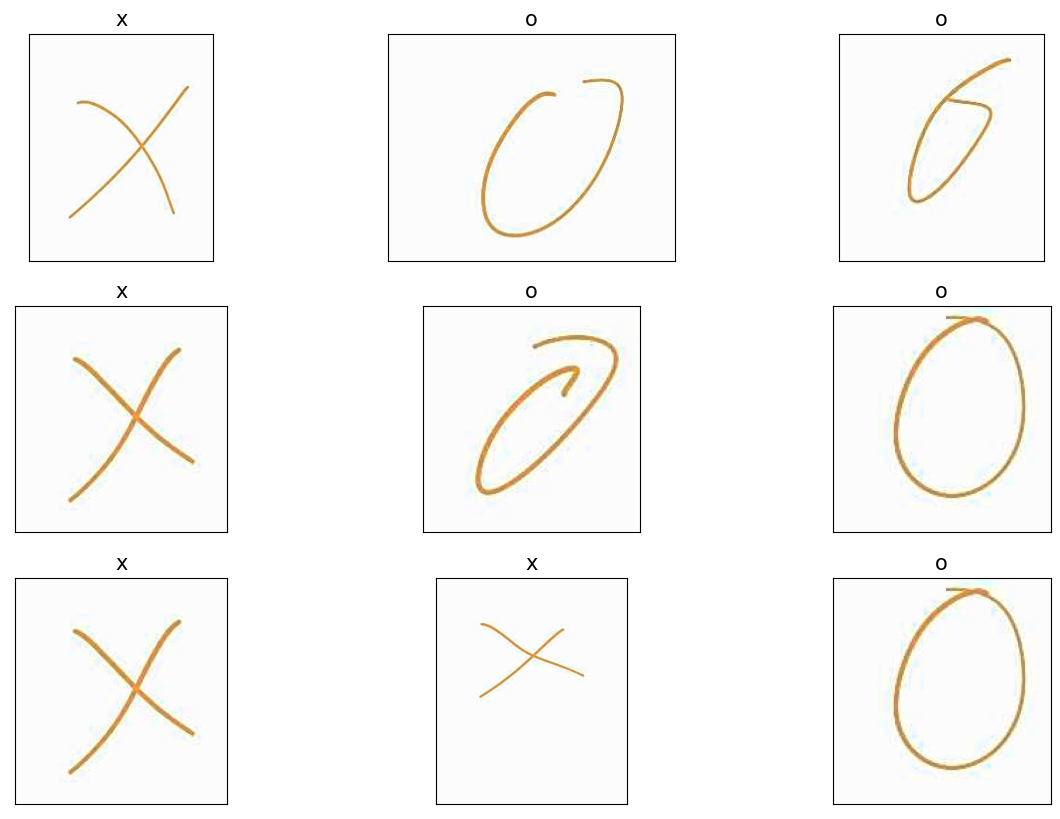

In [5]:
import cv2

plt.figure(figsize=(15, 10))

for i in range(9):
  random = np.random.randint(1, len(dataset))
  plt.subplot(3, 3, i+1)
  plt.imshow(cv2.imread(dataset.loc[random, "image_path"]))
  plt.title(dataset.loc[random, 'ox_status'], size = 15)
  plt.xticks([])
  plt.yticks([])

plt.show()

In [6]:
## train, test, validation으로 각각 저장

train_df = dataset[dataset["where"]=="Train"]
test_df = dataset[dataset["where"]=="Test"]

print(train_df.head(10))

                   image_path ox_status  where
0  ./data/o_x/Train/o/o40.jpg         o  Train
1  ./data/o_x/Train/o/o46.jpg         o  Train
2  ./data/o_x/Train/o/o43.jpg         o  Train
3  ./data/o_x/Train/o/o35.jpg         o  Train
4  ./data/o_x/Train/o/o31.jpg         o  Train
5  ./data/o_x/Train/o/o28.jpg         o  Train
6  ./data/o_x/Train/o/o48.jpg         o  Train
7  ./data/o_x/Train/o/o33.jpg         o  Train
8  ./data/o_x/Train/o/o34.jpg         o  Train
9  ./data/o_x/Train/o/o29.jpg         o  Train


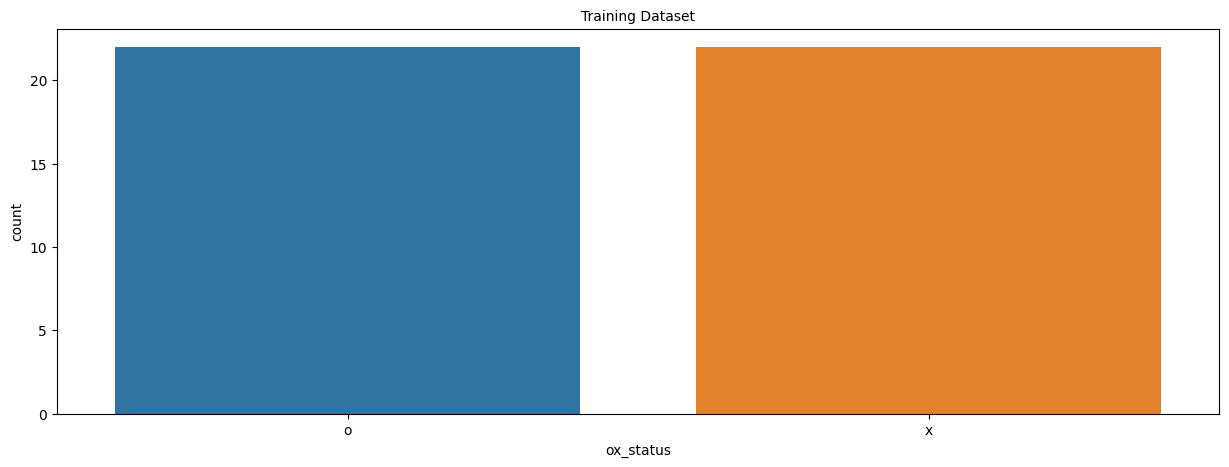

In [7]:
## Train, Test, Validation 별 분포

plt.figure(figsize = (15, 5))
plt.subplot(1, 1, 1)
sns.countplot(x = train_df["ox_status"])
plt.title("Training Dataset", size = 10)


plt.show()

In [8]:
## 인덱스 중간 정리!!

train_df = train_df.reset_index().drop("index", axis=1)
train_df.head()

,image_path,ox_status,where
0,./data/o_x/Train/o/o40.jpg,o,Train
1,./data/o_x/Train/o/o46.jpg,o,Train
2,./data/o_x/Train/o/o43.jpg,o,Train
3,./data/o_x/Train/o/o35.jpg,o,Train
4,./data/o_x/Train/o/o31.jpg,o,Train


In [9]:
## Gray 적용 후 Image resize 적용한 데이터를 data 에 저장

data = []
image_size = 150

for i in range(len(train_df)):
  ##  이미지를 회색으로 변환
  img_array = cv2.imread(train_df["image_path"][i], cv2.IMREAD_GRAYSCALE)

  ## array배열 Resize
  new_image_array = cv2.resize(img_array, (image_size, image_size))

  # 이미지를 라벨과 함께 인코딩
  if train_df["ox_status"][i] == "o":
    data.append([new_image_array, 1])
  else :
    data.append([new_image_array, 0])

In [10]:
## data 를 Numpy로 변경

type(data)

list

In [11]:
data = np.array(data)
type(data)

/tmp/ipykernel_37506/3133788812.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array(data)


numpy.ndarray

In [12]:
## data를 랜덤하게!!

np.random.shuffle(data)

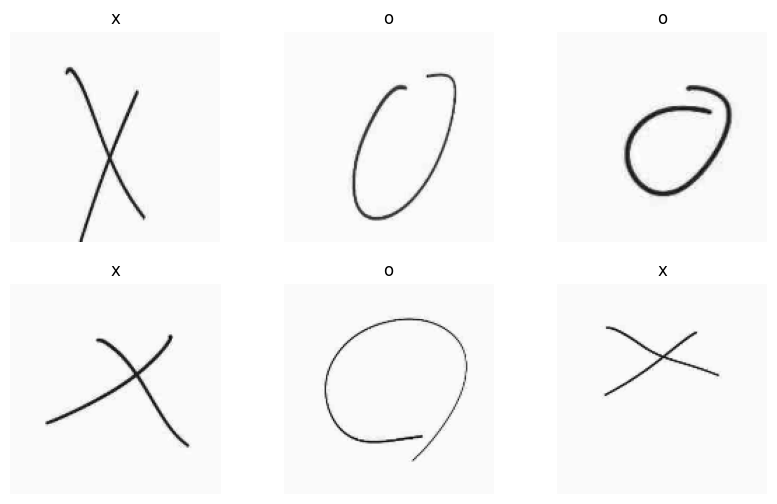

In [13]:
## 현재까지 데이터 확인!!

fig, ax = plt.subplots(2, 3, figsize=(10, 6))

for row in range(2):
  for col in range(3):
    image_index = row*10+col

    ax[row, col].axis("off")
    ax[row, col].imshow(data[image_index][0], cmap='gray')

    if data[image_index][1]==0:
      ax[row, col].set_title("x")
    else:
      ax[row, col].set_title("o")


plt.show()

In [14]:
data[0]

array([array([[252, 252, 252, ..., 252, 252, 252],
              [252, 252, 252, ..., 252, 252, 252],
              [252, 252, 252, ..., 252, 252, 252],
              ...,
              [252, 252, 252, ..., 252, 252, 252],
              [252, 252, 252, ..., 252, 252, 252],
              [252, 252, 252, ..., 252, 252, 252]], dtype=uint8), 0],
      dtype=object)

In [15]:
X = []
y = []

for image in data :
  X.append(image[0])
  y.append(image[1])

X = np.array(X)
y = np.array(y)

In [16]:
## test, train 으로 분리!!!

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [17]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, kernel_size = (5, 5), strides=(1,1),
                 padding='same', activation='relu',
                 input_shape=(150, 150, 1)),
    layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    layers.Conv2D(64, (2, 2), activation = 'relu', padding="same"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(1000, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 37, 37, 64)        0         
                                                                 
 flatten (Flatten)           (None, 87616)             0

In [18]:
## 파라미타 설정

model.compile(optimizer = 'adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [19]:
# 학습
X_train = X_train.reshape(len(X_train), X_train.shape[1], X_train.shape[2], 1)
X_val = X_val.reshape(len(X_val), X_val.shape[1], X_val.shape[2], 1)

history = model.fit(X_train, y_train, epochs=20, batch_size=2)

Epoch 1/20


2022-11-25 17:05:17.605902: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2022-11-25 17:05:18.130187: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8201
2022-11-25 17:05:19.378831: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2022-11-25 17:05:19.382650: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7f11ca585140 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2022-11-25 17:05:19.382665: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2022-11-25 17:05:19.385542: I tensorflow/compiler/mlir/tensorflow/utils/du

18/18 [==============================] - 4s 20ms/step - loss: 1451.1539 - accuracy: 0.4000
Epoch 2/20
18/18 [==============================] - 0s 15ms/step - loss: 29.6385 - accuracy: 0.5714
Epoch 3/20
18/18 [==============================] - 0s 15ms/step - loss: 1.4944e-06 - accuracy: 1.0000
Epoch 4/20
18/18 [==============================] - 0s 15ms/step - loss: 6.3960e-09 - accuracy: 1.0000
Epoch 5/20
18/18 [==============================] - 0s 15ms/step - loss: 1.9610 - accuracy: 0.9429
Epoch 6/20
18/18 [==============================] - 0s 15ms/step - loss: 1.6389 - accuracy: 0.9143
Epoch 7/20
18/18 [==============================] - 0s 15ms/step - loss: 4.2129 - accuracy: 0.8571
Epoch 8/20
18/18 [==============================] - 0s 15ms/step - loss: 11.0675 - accuracy: 0.8857
Epoch 9/20
18/18 [==============================] - 0s 15ms/step - loss: 7.6504 - accuracy: 0.7714
Epoch 10/20
18/18 [==============================] - 0s 15ms/step - loss: 3.2495 - accuracy: 0.9143
Epoch 1

In [20]:
## 모델 평가

model.evaluate(X_val, y_val)

1/1 [==============================] - 0s 125ms/step - loss: 0.0405 - accuracy: 1.0000


[0.04050716385245323, 1.0]

In [21]:
## confusion Matrix

prediction = model.predict(X_val)

prediction = np.where(prediction > 0.5, 1,0)
print(classification_report(y_val, prediction))
print(confusion_matrix(y_val, prediction))

1/1 [==============================] - 0s 75ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         4

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9

[[5 0]
 [0 4]]


In [22]:
wrong_result = []

for n in range(0, len(y_val)):
  if prediction[n] != y_val[n]:
    wrong_result.append(n)

len(wrong_result)

0

In [ ]:
import random

samples = random.choices(population=wrong_result, k=1)

plt.figure(figsize=(7, 6))


for idx, n in enumerate(samples):
  plt.subplot(1, 1, idx+1)
  plt.imshow(X_val[n].reshape(150, 150), interpolation='nearest')
  plt.title(prediction[n])
  plt.axis('off')

plt.show()